# Exercise Notebook

In [1]:
import main_tf as mtf
import pandas as pd
import tensorflow as tf

Using TensorFlow backend.


In [2]:
%load_ext autoreload
%autoreload 2

## Linear Estimator

In [3]:
training_file = 'https://storage.googleapis.com/tf-datasets/titanic/train.csv'

Training Set:
   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  

Statstics on Training Set:
         survived         age  n_siblings_spouses       parch        fare
count  627.000000  627.000000          627.000000  627.000000  627.000000
mean     0.387560   29.631308            0.545455    0.379585   34.385399
std      0.487582   12.511818            1.151090    0.792999   54.597730
min      0.000000    0.750000        

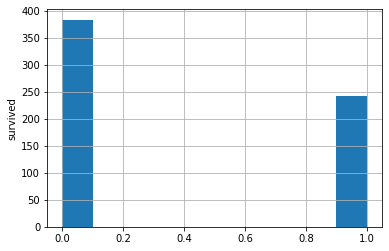

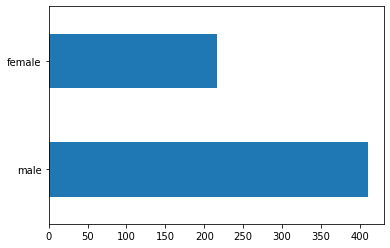

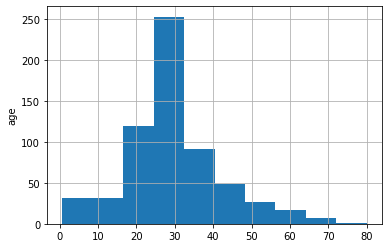

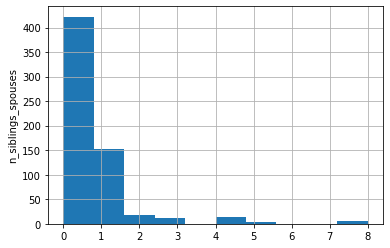

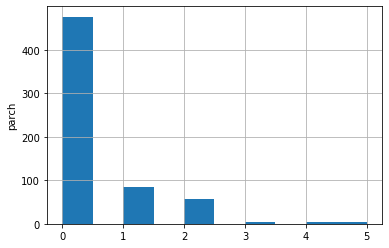

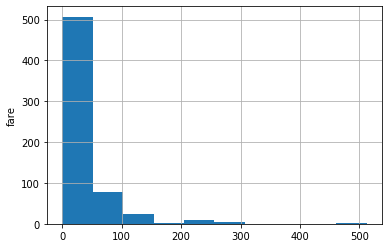

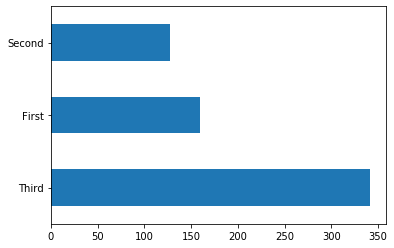

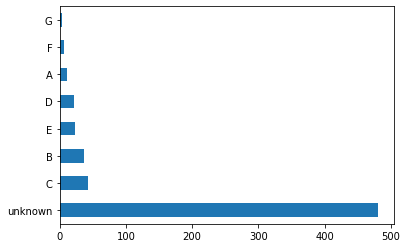

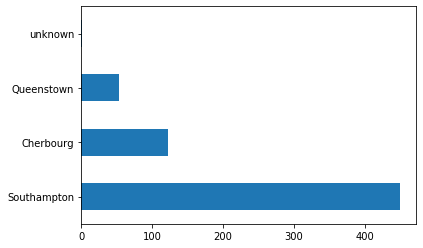

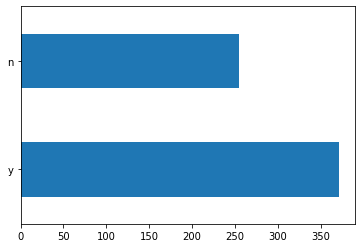

In [4]:
df = mtf.analyse_input(training_file)

In [5]:
output_field = 'survived'

In [6]:
trained_linear_estimator = mtf.train_linear_estimator(output_field = output_field, training_file = training_file, num_epochs = 10, batch_size = 32)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='parch', shape=(1,), defau

In [7]:
evaluation_file = 'https://storage.googleapis.com/tf-datasets/titanic/eval.csv'
output_field = 'survived'

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-08T14:58:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9ar30v2m/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.85840s
INFO:tensorflow:Finished evaluation at 2020-05-08-14:58:17
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7689394, accuracy_

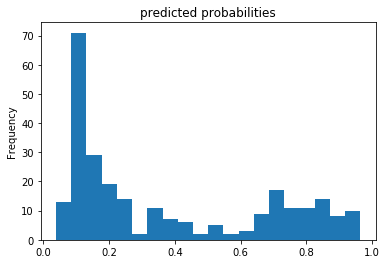

In [8]:
results, prediction_df = mtf.evaluate_linear_estimator(trained_linear_estimator, output_field, evaluation_file)

In [9]:
results

{'accuracy': 0.7689394,
 'accuracy_baseline': 0.625,
 'auc': 0.83651674,
 'auc_precision_recall': 0.80060625,
 'average_loss': 0.47398794,
 'label/mean': 0.375,
 'loss': 0.46243095,
 'precision': 0.7111111,
 'prediction/mean': 0.38001412,
 'recall': 0.64646465,
 'global_step': 200}

In [10]:
prediction_df

,logits,logistic,probabilities,class_ids,classes,all_class_ids,all_classes
0,[-2.273957],[0.09330292],"[0.90669703, 0.09330291]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
1,[-0.6045219],[0.35330984],"[0.64669013, 0.35330984]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
2,[1.0594343],[0.74258244],"[0.2574176, 0.74258244]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
3,[0.84074616],[0.69862235],"[0.30137765, 0.69862235]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
4,[-1.0177644],[0.26546308],"[0.7345369, 0.26546308]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
...,...,...,...,...,...,...,...
259,[1.7033962],[0.8459778],"[0.15402222, 0.8459778]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
260,[-2.2364383],[0.096525714],"[0.9034743, 0.09652571]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
261,[0.25603262],[0.56366074],"[0.43633923, 0.56366074]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
262,[-1.4231112],[0.1941743],"[0.80582565, 0.19417429]",[0],[b'0'],"[0, 1]","[b'0', b'1']"


In [11]:
mydf = prediction_df

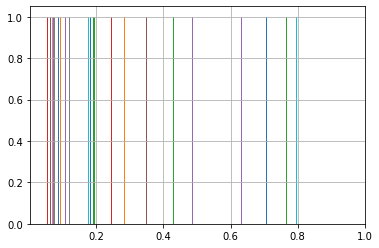

In [12]:
prediction_df['logistic'].hist()

## Classification
diffirentiate between data points and separate them into classes.
Returns the probability that an entry is inside a class.

In [13]:
mtf.analyse_input_classification()

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


In [14]:
output_field = 'Species'

In [15]:
train_df, train_df_y, my_feature_columns = mtf.preprocess_dataset_classification(output_field)

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0
(120, 4)
[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [16]:
classifier = mtf.train_classifier(output_field)

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0
(120, 4)
[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpy7c8kqpv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_se

In [17]:
mtf.evaluate_classifier(classifier, output_field)

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          5.9         3.0          4.2         1.5        1
1          6.9         3.1          5.4         2.1        2
2          5.1         3.3          1.7         0.5        0
3          6.0         3.4          4.5         1.6        1
4          5.5         2.5          4.0         1.3        1
(30, 4)
[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to

In [18]:
# Here is some example input and expected classes you can try above
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

In [19]:
mtf.classifier_predictions(classifier, output_field)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
Please type numeric values as prompted.
SepalLength: 1.0
SepalWidth: 1.0
PetalLength: 1.0
PetalWidth: 1.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpy7c8kqpv/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Versicolor" (43.5%)


## Clustering
groupping data points. (unsupervised learning algorithm).
you need to know how many clusters you want.

## Hidden Markov Models
deals with probability distribution.
calculate probability based on data.
"hidden" because we never interact with the states, but with the observation.
The point is to predict future events based on past events.

number of states: 2
mean = [12.       11.1      10.83     10.748999 10.724698 10.71741  10.715222]


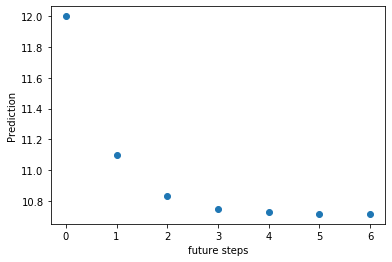

In [20]:
mtf.hidden_markov_model()

# Neural Networks

## (Dense) Neural Networks
densly connected = all connected
weights = connections
weight of bias = 1
number oc onnections = product between layers
the loss fnction calculates how far we are from predictions.
The optimizer does the gradient descent and back-propagation.
backpropagation updates the weights and biases.
Learns patterns locally.

(60000, 28, 28)
194
[9 0 0 3 0 2 7 2 5 5]
<class 'numpy.ndarray'>


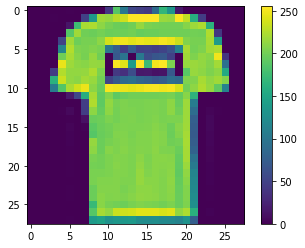

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4940 - accuracy: 0.8249
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3705 - accuracy: 0.8656
Epoch 3/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3353 - accuracy: 0.8781
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3093 - accuracy: 0.8873
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2937 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2767 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2669 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2548 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2455 - accuracy: 0.9076
Epoch 10/10
10

In [30]:
model = mtf.neural_network_images()

In [33]:
import matplotlib.pyplot as plt
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


Pick a number: 1


NameError: name 'test_images' is not defined

## Convolutional Neural Network (Deep Learning)

## Deep Computer Vision

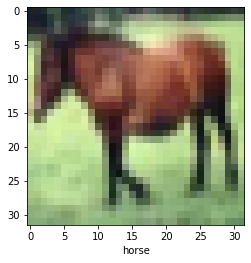

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [3]:
model, train_images, train_labels, test_images, test_labels = mtf.convolutional_neural_network_images()

In [4]:
model, history = mtf.train_convolutional_neural_network(model, train_images, train_labels, test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 34s 688us/sample - loss: 1.4906 - accuracy: 0.4585 - val_loss: 1.2636 - val_accuracy: 0.5456
Epoch 2/4
50000/50000 [==============================] - 36s 721us/sample - loss: 1.1304 - accuracy: 0.6001 - val_loss: 1.1278 - val_accuracy: 0.6001
Epoch 3/4
50000/50000 [==============================] - 37s 743us/sample - loss: 0.9817 - accuracy: 0.6564 - val_loss: 1.0794 - val_accuracy: 0.6189
Epoch 4/4
50000/50000 [==============================] - 39s 775us/sample - loss: 0.8857 - accuracy: 0.6883 - val_loss: 0.9193 - val_accuracy: 0.6780
10000/10000 - 2s - loss: 0.9193 - accuracy: 0.6780
0.678


In [5]:
history

In [6]:
model

### Working with small datasets
data augmentation (rotate, stretch, zoom)

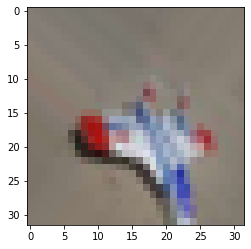

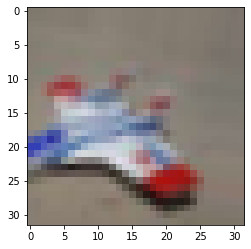

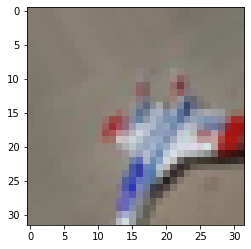

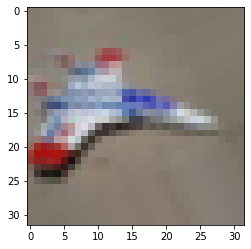

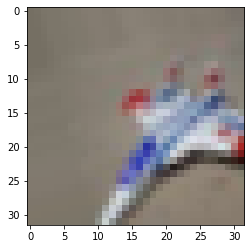

In [7]:
mtf.data_augmentation(train_images, image_index = 30)

### Pre-trained Models
use part of another model as starting point.

Original shape: (421, 256, 3)
Original shape: (375, 500, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


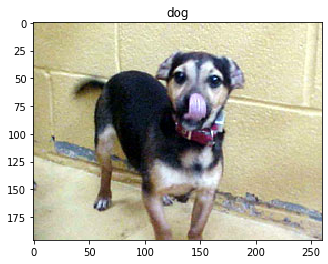

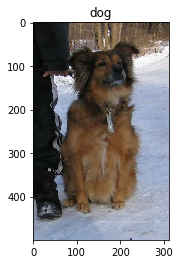

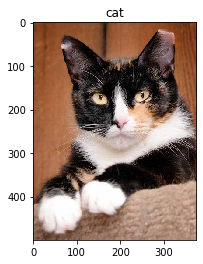

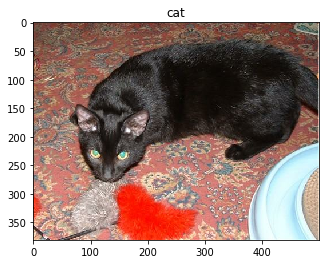

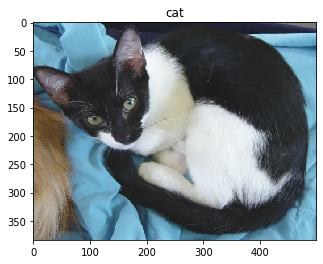

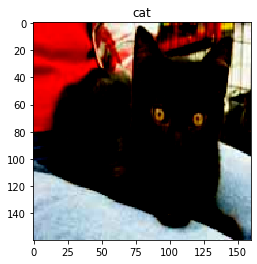

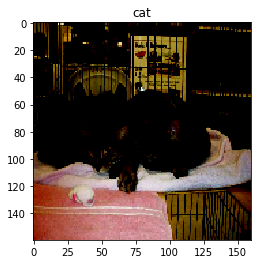

In [31]:
train_batches, validation_batches = mtf.use_pretrained_dataset()

In [32]:
model = mtf.pick_pretrained(train_batches)

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

(32, 5, 5, 1280)
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
______________________________________________________________

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [35]:
new_model = mtf.train_pretrained(model, train_batches, validation_batches)

20/20 [==============================] - 10s 509ms/step - loss: 0.3997 - accuracy: 0.7672
loss0 = 0.3997191697359085, accuracy0 = 0.7671874761581421
Epoch 1/3
    483/Unknown - 399s 826ms/step - loss: 0.3031 - accuracy: 0.8616

KeyboardInterrupt: 

# Object detection (Applictaion of CNN)

# Recurrent Neural Network
They containe an internal loop. They are used for:
spell check, autocomplete, chatbot.
turn text data into numeric data (bag of words, works for simple text).
word embedding(classify similar words into similar numbers, vectorization through layer. Projection)

In [3]:
mtf.test_bag_of_words()

{3: 1}
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


In [25]:
train_data, train_labels, test_data, test_labels = mtf.movie_review()

In [26]:
train_data, test_data = mtf.pre_process_movie_review(train_data, test_data)

the actual maximum length is: 2494
the used maximum lenght is: 260


In [27]:
model = mtf.movie_RNN_model()

In [28]:
type(train_labels)

numpy.ndarray

In [29]:
model, history = mtf.train_movie_RNN(model, train_data, train_labels)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 75s 4ms/sample - loss: 0.4258 - acc: 0.8044 - val_loss: 0.2965 - val_acc: 0.8776
Epoch 2/10
20000/20000 [==============================] - 65s 3ms/sample - loss: 0.2423 - acc: 0.9096 - val_loss: 0.2687 - val_acc: 0.8930
Epoch 3/10
20000/20000 [==============================] - 63s 3ms/sample - loss: 0.1840 - acc: 0.9321 - val_loss: 0.2723 - val_acc: 0.8944
Epoch 4/10
20000/20000 [==============================] - 63s 3ms/sample - loss: 0.1512 - acc: 0.9451 - val_loss: 0.3479 - val_acc: 0.8876
Epoch 5/10
20000/20000 [==============================] - 63s 3ms/sample - loss: 0.1297 - acc: 0.9538 - val_loss: 0.3020 - val_acc: 0.8860
Epoch 6/10
20000/20000 [==============================] - 64s 3ms/sample - loss: 0.1118 - acc: 0.9609 - val_loss: 0.3224 - val_acc: 0.8908
Epoch 7/10
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.0993 - acc: 0.9661 - val_loss: 0.3

In [31]:
results = mtf.evaluate_movie_RNN(model, test_data, test_labels)

25000/25000 [==============================] - 29s 1ms/sample - loss: 0.5271 - acc: 0.8552


In [32]:
results

[0.5270630823755265, 0.8552]

In [43]:
integers = mtf.evaluate_code_text()
integers

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [44]:
decoded = mtf.decode_integers(integers)
decoded

'that movie was just amazing so amazing'

In [53]:
positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
mtf.predict_en_de(positive_review, model)

The review is positive ([0.84312433] accuracy)


In [54]:
negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
mtf.predict_en_de(negative_review, model)

The review is negative ([0.3085082] accuracy)
